In [1]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables, Brillouin
using PyCall
np = pyimport("numpy")
include("plotting_utilities.jl")
cm = 1/2.54;

In [2]:
loaded_data_sg16 = load("./symeigs/sg16-fillings-data.jld2")
loaded_data_sg10 = load("./symeigs/sg10-fillings-data.jld2")
loaded_data_sg2 = load("./symeigs/sg2-fillings-data.jld2");

In [14]:
# Test making more coarse-grained data

In [3]:
#coarse_grained_filling_range = [(2n-1):(2n) for n in 1:6]
coarse_grained_filling_range = [1:4, 5:8, 9:13];
#coarse_grained_filling_range = [n:n for n in 1:13] #Sanity check
num_fillings = length(coarse_grained_filling_range);

In [4]:
fillings = collect(0.2:0.05:0.8)
[fillings[x] for x in coarse_grained_filling_range]

3-element Vector{Vector{Float64}}:
 [0.2, 0.25, 0.3, 0.35]
 [0.4, 0.45, 0.5, 0.55]
 [0.6, 0.65, 0.7, 0.75, 0.8]

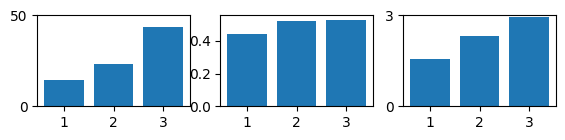

In [5]:
figure(figsize=(17cm, 3cm))
subplot(1, 3, 1)

fig_dir = "./Fillings_Figs/"

mode="tm"

stable_data = loaded_data_sg2["stable_count"]
total_data = loaded_data_sg2["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
bar(1:num_fillings, 100*y ./ x)
ylim(0, 50)
yticks([0, 50])
@assert sum(x) == 10000


subplot(1, 3, 2)
stable_data = loaded_data_sg10["stable_count"]
total_data = loaded_data_sg10["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
bar(1:num_fillings, 100*y ./ x)
#ylim(0, 0.6)
#yticks([0, 0.6])
@assert sum(x) == 10000


subplot(1, 3, 3)
stable_data = loaded_data_sg16["stable_count"]
total_data = loaded_data_sg16["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
bar(1:num_fillings, 100*y ./ x)
ylim(0, 3)
yticks([0,3])
@assert sum(x) == 10000

#savefig(fig_dir*"stable_wrt_fillings_tm.pdf")

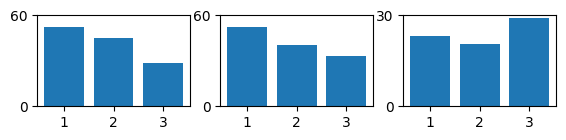

In [6]:
figure(figsize=(17cm, 3cm))
subplot(1, 3, 1)

mode = "te"

stable_data = loaded_data_sg2["stable_count"]
total_data = loaded_data_sg2["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
bar(1:num_fillings, 100*y ./ x)
ylim(0, 60)
yticks([0, 60])
@assert sum(x) == 10000


subplot(1, 3, 2)
stable_data = loaded_data_sg10["stable_count"]
total_data = loaded_data_sg10["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
bar(1:num_fillings, 100*y ./ x)
ylim(0, 60)
yticks([0, 60])
@assert sum(x) == 10000


subplot(1, 3, 3)
stable_data = loaded_data_sg16["stable_count"]
total_data = loaded_data_sg16["total_count"]
y = [sum([stable_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
x = [sum([total_data[(mode, id)][1] for id in coarse_grained_filling_range[i]]) for i in 1:num_fillings] 
bar(1:num_fillings, 100*y ./ x)
ylim(0, 30)
yticks([0, 30])
@assert sum(x) == 10000
#savefig(fig_dir*"stable_wrt_fillings_te.pdf")